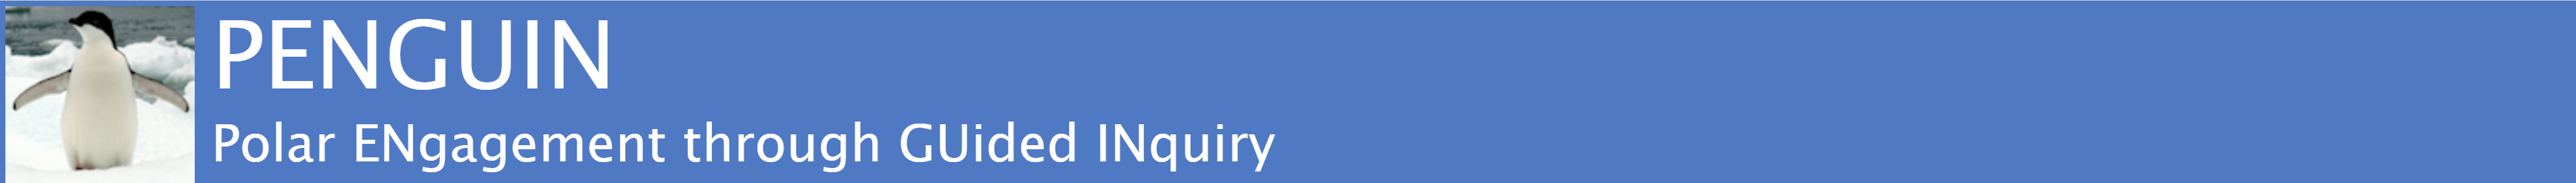

# Processing Sea Ice Images - 2. Image Repair and Edge Detection

Created by Haiyan Cheng, Penny Rowe and Steven Neshyba.

### Learning Objectives
1. Learn how to use median filtering to remove noise from an image.
2. Learn how to use the function "medflt" from scipy's signal processing module (scipy.signal).
3. Apply Edge Detection to detect the sea ice edge.

### Pre-class activities
1. Read Section 2.2 on Image Repair and Section 2.3 on Image Edge Detection in the Image Processing pdf.
3. Describe the conditions for pixels to be neighbors.
4. Describe what medfilt does.


In [1]:
# Following are the modules we will need.

# For looking at directory contents
import os

# For plotting
import matplotlib.pyplot as plt

# For reading in files
import imageio.v2 as imageio

#from PIL import Image
import copy
import numpy as np

# Import medfilt from the scipy.signal module
from scipy.signal import medfilt

# Edge detection filters
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.feature import canny

## 2.2 Image Repair

Write a Python program to clean up unwanted specks in an image.

1. Practice converting a figure to black and white and cropping it.
2. Perform a median filter for each of the pixel values to repair the image.
3. Comparing fitering using mean and median.
6. Use the function medfilt2 to repair the image.
7. (Advanced) Write the median filter into a function: medianfilter, which takes a contaminated image as input and produces a repaired image as output.


### 2.2.1. Read in and display the image: N_198111_extn_v2.1.png

In [2]:
# .. Check out our data
data_dir = 'input/'
os.listdir(data_dir)

['WillametteMap',
 'august9_arctic_worldview_500mres.jpg',
 'Willamette_colors.png',
 'WillametteMapInd',
 '.gitignore',
 'N_198111_extn_v2.1_edited.png',
 'IceImage2.jpg',
 'IceImage.jpg',
 'my-images',
 'Willamette_colors2.png']

(-0.5, 419.5, 499.5, -0.5)

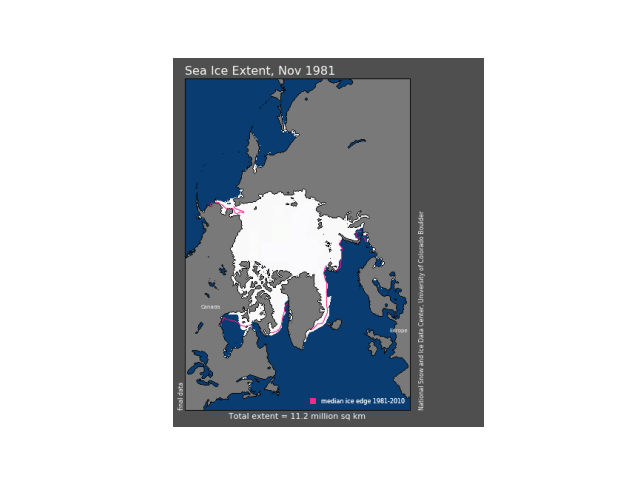

In [3]:
# Print inline figures that can be saved
%matplotlib notebook
A = imageio.imread(data_dir + 'N_198111_extn_v2.1_edited.png')
plt.imshow(A)
plt.axis('off')


### 2.2.2 Convert the figure to black and white, crop it to include only the central image, and display again.

### Try your skill:
Look back at the previous notebook and see if you can convert the image to black and white

In [4]:
# .. Convert to black and white
A_bw =


(-0.5, 259.5, 429.5, -0.5)

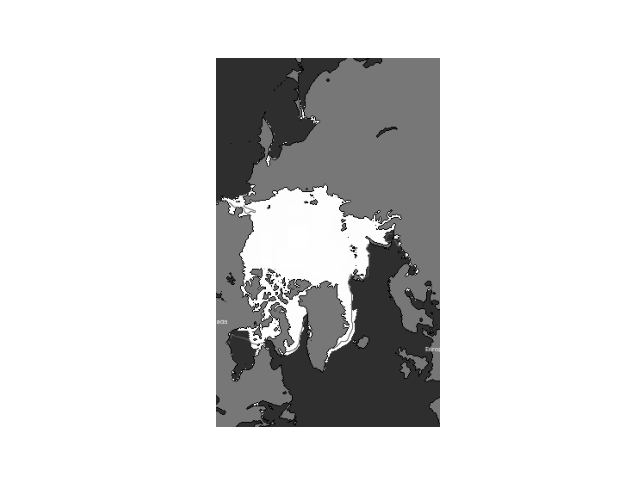

In [5]:
# .. Crop to include only the central box
A_bw = A_bw[30:460, 50:310]

# .. Print the image
plt.figure()
plt.imshow(A_bw, cmap='gray')
plt.axis('off')

(-0.5, 259.5, 429.5, -0.5)

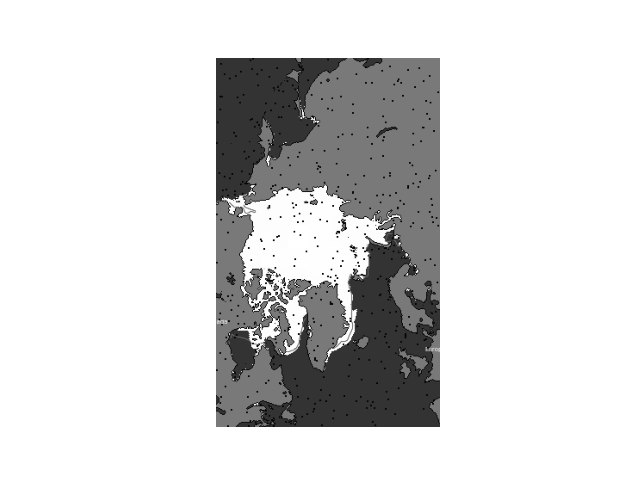

In [6]:
# .. Add some noise to the image, save it and display it again

A_bw_dirty = copy.deepcopy(A_bw) 
 
Num_specks = 500
for k in range(Num_specks):
    i = int(np.floor(np.random.rand(1) * (A_bw.shape[0]-1) )); 
    j = int(np.floor(np.random.rand(1) * (A_bw.shape[1]-1) ));
    A_bw_dirty[i:i+2, j:j+2] = np.floor(10 * np.random.rand(2,2)); 


plt.figure()
plt.imshow(A_bw_dirty, cmap='gray')
plt.axis('off')

### 2.2.3 Perform a median filter for each of the pixel values.

Below we will apply a median filter and see how well it does at removing the noise.

In [7]:
A_clean = copy.deepcopy(A_bw_dirty)
m = A_bw_dirty.shape[0]; n = A_bw_dirty.shape[1]
for i in range(m):
    for j in range(n):
        
        # The 3-by-3 matrix of neighbors
        iMin = np.max([1, i - 1])
        iMax = np.min([m, i + 2])
        jMin = np.max([1, j - 1])
        jMax = np.min([n, j + 2])
        Neighbors = copy.deepcopy(A_bw_dirty[iMin : iMax, jMin : jMax]); 
        
        # The median value
        # : convert matrix into 1-dimension array (column-major)
        A_clean[i, j] = np.median(Neighbors[:])

### 2.2.4. Display the repaired image.

Text(0.5, 1.0, 'Median filter')

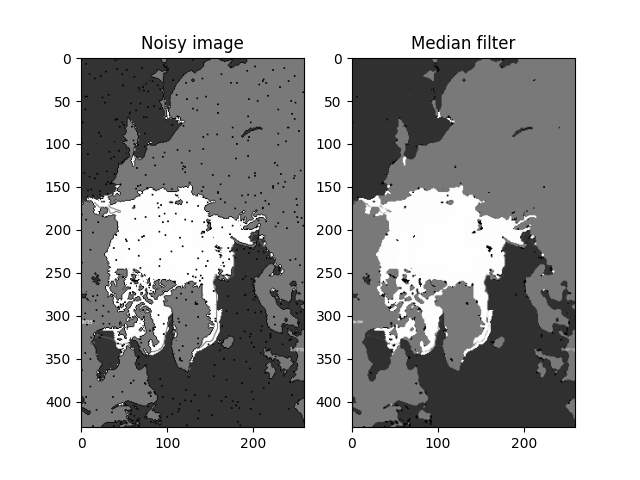

In [8]:

plt.figure()
plt.subplot(121)
plt.imshow(A_bw_dirty, cmap='gray')
plt.title('Noisy image')

plt.subplot(122)
plt.imshow(A_clean, cmap='gray')
plt.title('Median filter')


(80.0, 86.0)

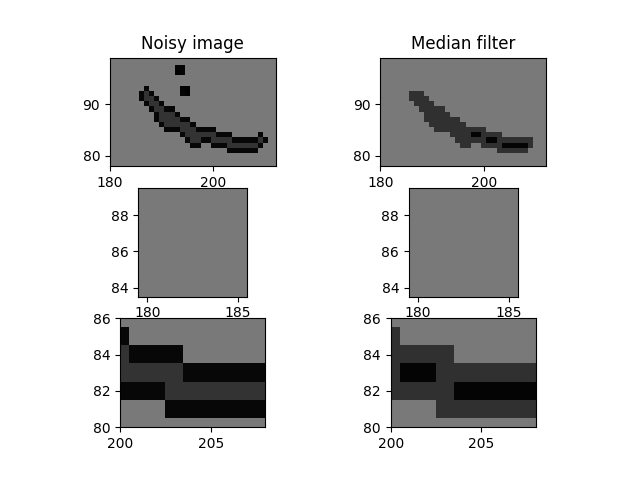

In [9]:
# Zoom in on smaller regions to see what the filter did

plt.figure()
plt.subplot(321)
plt.imshow(A_bw_dirty,cmap='gray')
plt.title('Noisy image')
plt.xlim([180,212]); plt.ylim([78,99])

# Lake region
plt.subplot(322)
plt.imshow(A_clean,cmap='gray')
plt.title('Median filter')
plt.xlim([180,212]); plt.ylim([78,99])

plt.subplot(323)
plt.imshow(A_bw_dirty,cmap='gray')
plt.xlim([179.5,185.5]); plt.ylim([83.5,89.5])

# A single pixel
plt.subplot(324)
plt.imshow(A_clean,cmap='gray')
plt.xlim([179.5,185.5]); plt.ylim([83.5,89.5])

# part of lake
plt.subplot(325)
plt.imshow(A_bw_dirty,cmap='gray')
plt.xlim([200,208]); plt.ylim([80,86])

plt.subplot(326)
plt.imshow(A_clean,cmap='gray')
plt.xlim([200,208]); plt.ylim([80,86])


# Hint: stretch out the figure by clicking and dragging the triangle
# in the lower right.


### Try your skill.

Try to use the mean (np.mean) instead of median (np.median) to generate a new filtered image for comparison. (You can copy and paste the code from above here and then modify it.) Then make a 3 panel plot comparing noisy, median, and mean.

In [10]:
# .. Finish the code below for the mean
A_mean = copy.deepcopy(A_bw_dirty)



Text(0.5, 1.0, 'Mean image')

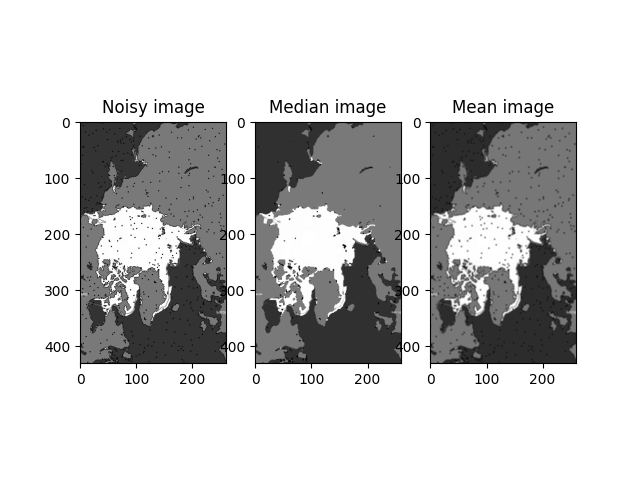

In [11]:
# .. Finish the code below to make a 3-panel plot here comparing noisy, median, and mean
plt.figure()
plt.subplot(131)
plt.imshow(A_bw_dirty, cmap='gray')
plt.title('Noisy image')

plt.subplot(132)

plt.subplot(133)

Zoom in on a region in each panel to see how the mean differs.

### 2.2.6. Use medfilt for similar image repair result.

Text(0.5, 1.0, 'Median filter: My code')

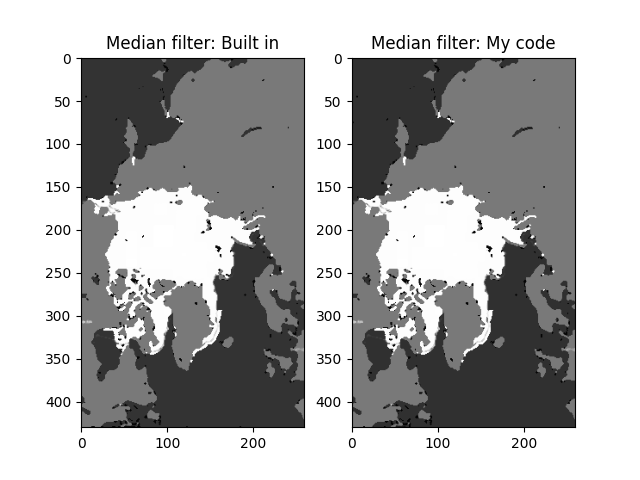

In [12]:
A_medfilt = medfilt(A_bw_dirty)

plt.figure()
plt.subplot(121)
plt.imshow(A_medfilt,cmap='gray')
plt.title('Median filter: Built in')

plt.subplot(122)
plt.imshow(A_clean,cmap='gray')
plt.title('Median filter: My code')

### 2.2.7. (Advanced) Write the median filter into a function: medianfilter

In [13]:
# .. Finish the function to write the median filter into a function
def medianfilter(A):

    return A_median_filtered
        

(-0.5, 259.5, 429.5, -0.5)

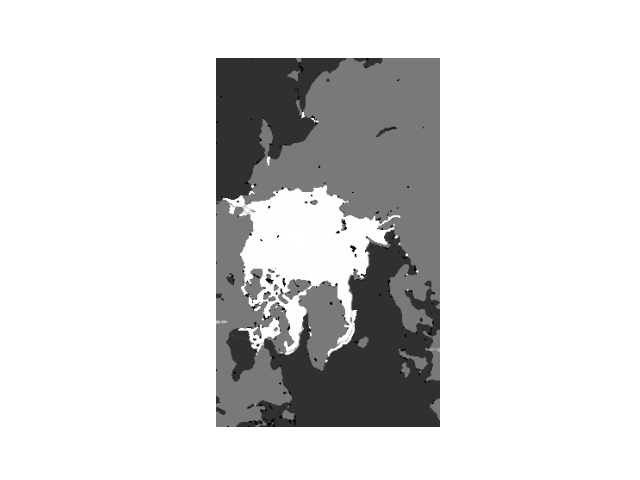

In [14]:
# Call the function and plot the result here
A_fun = medianfilter(A_bw_dirty)
plt.figure()
plt.imshow(A_fun,cmap='gray')
plt.axis('off')

## 2.3 Image Edge Detection

1. Implement the edge detection algorithm described above. Basically, for each pixel in the original image, if the maximum discrepancy of the pixel with respect to its neighbor is greater than a predefined threshold $\tau$, color it to black, otherwise color it to white. 
2. Display the pattern created from the original image. This is the image with the edge detected.
3. Use the \mymatlab~built-in function for edge detection. Read the help document for \red{edge} command and try different algorithms to see the results. For each result, display the image title with corresponding algorithm name.

### Read in the image: N_198111_extn_v2.1.png. Convert the figure to black and white, crop it to include only the central image, and display.

(-0.5, 259.5, 429.5, -0.5)

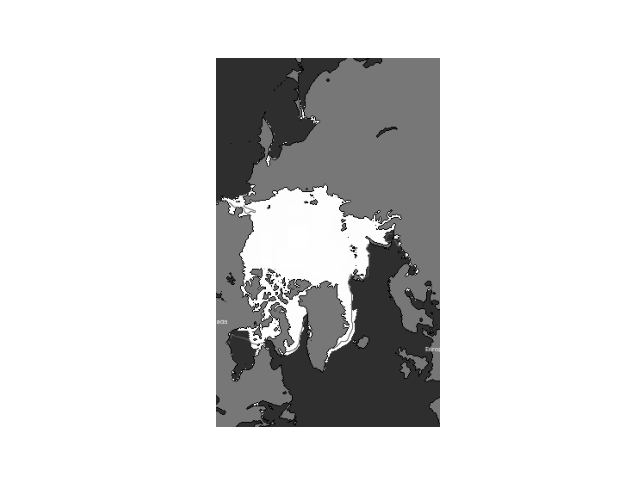

In [21]:
# Print inline figures that can be saved
dir = 'input/'
A = imageio.imread(dir + 'N_198111_extn_v2.1_edited.png')

# Convert to black and white
sea_ice_BW = 0.299*A[:, :, 0] + 0.587*A[:, :, 1] + 0.114*A[:, :, 2] 

# Crop to include only the central box
sea_ice_crop = sea_ice_BW[30:460, 50:310]

plt.figure()
plt.imshow(sea_ice_crop,cmap='gray')
plt.axis('off')

### 2.3.1 Implement the edge detection algorithm

In [16]:
# Maximum discrepancy algorithm
def maximum_discrepancy(A):
    center = A[1,1]
    indicies = ((0,0),(0,1),(0,2),
                (1,0),      (1,2),
                (2,0),(2,1),(2,2))
    discrepancies = []
    for i in indicies:
        discrepancies.append(abs(center-A[i[0],i[1]]))
    return max(discrepancies)

In [17]:
# Edge detection algorithm
def getEdges(img,thresh=75):
    # Initialization
    edgeimg = np.zeros(img.shape)

    # Look for edges by looping over each pixel and checking if its 
    # maximum discrepancy is greater than the threshold value "thresh"
    for x in range(0,img.shape[0]-3):
        for y in range(0,img.shape[1]-3):
            max_dcrep = maximum_discrepancy(img[x:x+3,y:y+3])
            if max_dcrep >= thresh:
                edgeimg[x+1,y+1] = 255 #    max_dcrep #
                
    return edgeimg

In [18]:
# Get the new image of identified edges
#edgeimg0 = getEdges(sea_ice_clean,100)
edgeimg0 = getEdges(sea_ice_crop,100)

### 2.3.2 Display the pattern created from the original image. This is the image with the edge detected.

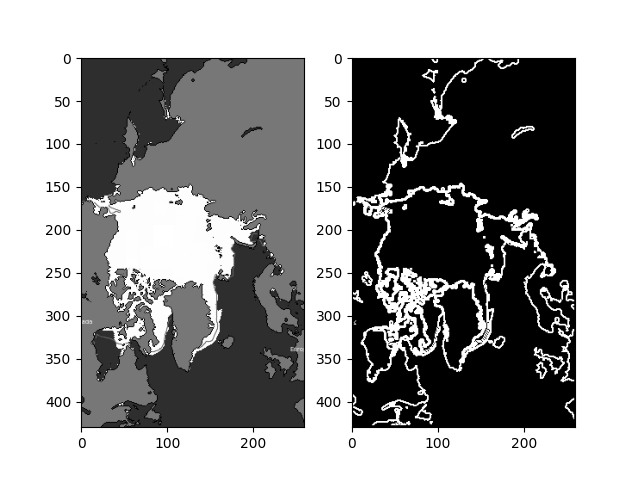

In [19]:
# Plot the results
plt.figure()
plt.subplot(121)
plt.imshow(sea_ice_crop,cmap='gray')

plt.subplot(122)
plt.imshow(edgeimg0,cmap='gray')


### 2.3.3. Use the edge detection algorithms that are part of the skimage filters

Text(0.5, 1.0, 'Canny Edge Detection')

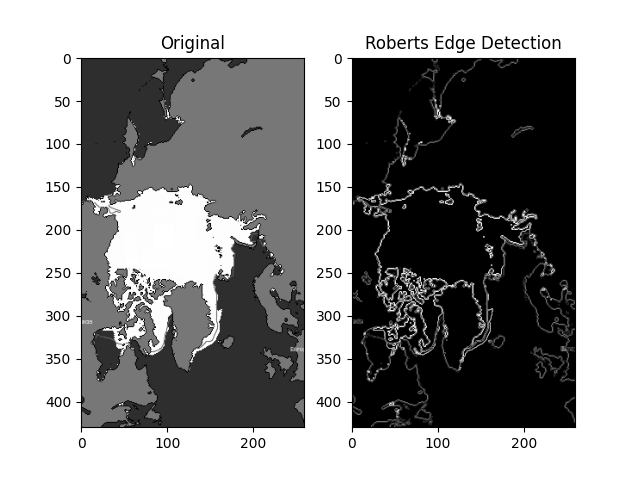

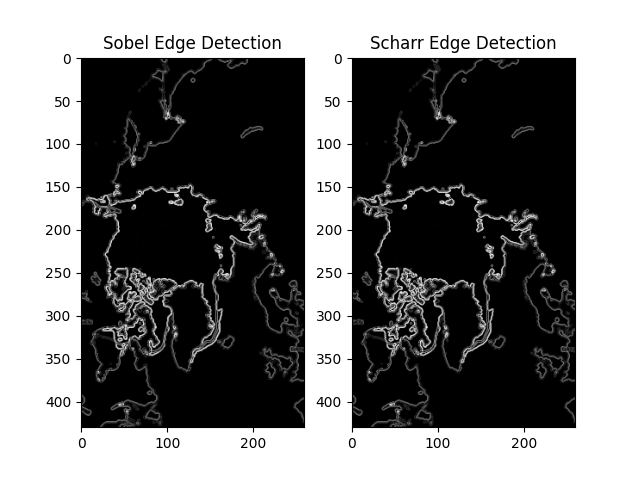

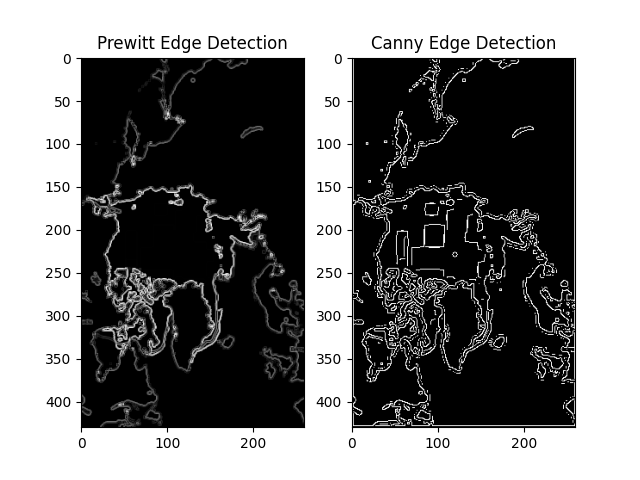

In [20]:
# Recall that the possibilities for the filter are:
#  roberts, sobel, scharr, prewitt, canny

edge_roberts = roberts(sea_ice_crop)
edge_sobel = sobel(sea_ice_crop)
edge_scharr = scharr(sea_ice_crop)
edge_prewitt = prewitt(sea_ice_crop)
edge_canny = canny(sea_ice_crop)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(sea_ice_crop, cmap=plt.cm.gray)
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(edge_roberts, cmap=plt.cm.gray)
plt.title('Roberts Edge Detection')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(edge_sobel, cmap=plt.cm.gray)
plt.title('Sobel Edge Detection')

plt.subplot(1,2,2)
plt.imshow(edge_scharr, cmap=plt.cm.gray)
plt.title('Scharr Edge Detection')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(edge_prewitt, cmap=plt.cm.gray)
plt.title('Prewitt Edge Detection')

plt.subplot(1,2,2)
plt.imshow(edge_canny, cmap=plt.cm.gray)
plt.title('Canny Edge Detection')

<img src="https://www.nsf.gov/images/logos/NSF_4-Color_bitmap_Logo.png" height="100" width="100" align="left" style="vertical-align:bottom;margin:0 px 20px"/>  This PENGUIN module was created with funding from the National Science Foundation. Creative Commons Copyright. You may freely use and share with attribution to the PENGUIN project as follows:  

Rowe, P.M. et al (2020): Integrating polar research into undergraduate curricula using computational guided inquiry, Journal of Geoscience Education, 
https://doi.org/10.1080/10899995.2020.1768004.


### For more on Processing Images of Arctic Ice, click a link below:
<font size="4">[Arctic Ice Images - 1. Arctic sea ice images](https://www.kaggle.com/pennyrowe/arctic-ice-images-1)  
[Arctic Ice Images - 2. Image Repair and Edge Detection (this notebook)](https://www.kaggle.com/pennyrowe/arctic-ice-images-2)  
[Arctic Ice Images - 3. Scene Identification](https://www.kaggle.com/pennyrowe/arctic-ice-images-3)  </font>

### Check out other PENGUIN Modules on Kaggle

<font size="4">[Processing Images of Arctic Ice](https://www.kaggle.com/pennyrowe/arctic-ice-images-1)</font>  
Satellites capture images of the globe continuously, providing a changing view of Earth's surface. These images reveal land cover and allow tracking events like hurricanes and fires. This module explores image processing of satellite images in polar regions. The module starts with exploring how images are loaded, plotted, and stored; how they can be manipulated to produce true and false-color and black and white images; and color mapping. Activites also include edge detection, noise removal, determining snow and sea ice extent, and scene identification. 

<font size="4">[Ice Cores and Climate Change](https://www.kaggle.com/pennyrowe/ice_cores)</font>  
As snow accumulates onto ice sheets over hundreds or thousands of years, air bubbles are trapped as the snow is compressed into firn and then ice. Ice cores serve as recorders of past climate and atmospheric concentration. In this module, work with data from ice cores from the East Antarctic Ice Sheet and Greenland, in order to explore earth's past climate and glacial cycles. Explore how temperature and CO$_2$ vary over the last 425,000 years, and how this is linked to changes in Earth's orbit.

<font size="4">[Permafrost](https://www.kaggle.com/pennyrowe/permafrost)</font>  
Learn what permafrost is, the implications of permafrost thawing due to climate change, and how to calculate heat diffusion through permafrost. Activities include watching a video about permafrost, checking out a journal article, and downloading, plotting and analyzing permafrost data. Learn how permafrost temperature changes with depth underground, seasonally, and annually, and calculate heat flow through permafrost.

<font size="4">[Polar Spectra](https://www.kaggle.com/pennyrowe/polar-spectra-1)</font>  
Learn about the greenhouse effect by examining a "forbidden" rovibrational band in the infrared emission spectra of Earth's atmosphere, recorded from the surface at South Pole Station. By weighting rotational energy degeneracies with a Boltzmann factor, you can simulate the R-branch of the band - the result is a rudimentary estimate of the average temperature of the troposphere above the South Pole. Finally, try a second method of estimating the near-surface temperature, through matching South Polar radiative emission to a Planck Blackbody Spectrum. 

<font size="4">[Seasonal Arctic Ice Melt](https://www.kaggle.com/pennyrowe/sea-ice-melt-1)</font>  
Learn about thermodynamics topics through calculation of the amount of heat required to melt Arctic sea ice. Watch an online animation of changing polar ice with time, downloading data of Arctic ice extent and volume. Activities include using thermodynamic principles and equations to plot the phase diagram of water, find the freezing point depression of Arctic sea ice in equilibrium with sea water, and compute the change in the enthalpy of fusion of water resulting from that temperature depression.
